In [109]:
from clifford.g3c import *
from numpy import e,pi
import math
from clifford.tools.g3c.GAOnline import *

### Given Constraints

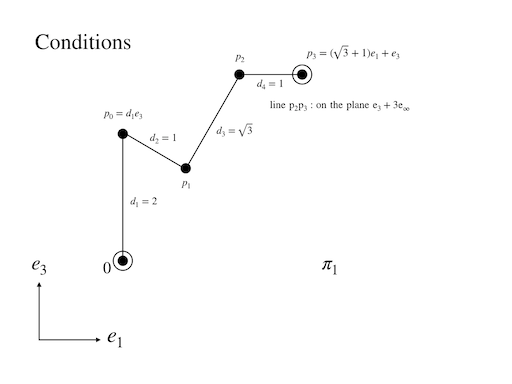

In [110]:
from IPython.display import Image, display_png
display_png(Image('./figures/ik_conditions.png'))

In [111]:
point0 = 2 * e3
point3 = (math.sqrt(3) + 1) * e1 + 3 * e3
plane3 = (e3 + 3 * einf).dual()
d1 = 2
d2 = 1
d3 = math.sqrt(3)
d4 = 1

In [112]:
sc = GAScene()
sc.add_euc_point(point0, 'rgb(255,0,0)')
sc.add_euc_point(point3, 'rgb(0,255,0)')
sc.add_plane(plane3, 'rgb(100,100,0)')
print(sc)

DrawEucPoint((2^e3),rgb(255,0,0));
DrawEucPoint((2.73205^e1) + (3.0^e3),rgb(0,255,0));
DrawPlane((3.0^e1234) + (3.0^e1235) - (1.0^e1245),rgb(100,100,0));


### Inverse Kinematics

In [113]:
plane1 = up(0) ^ up(point0) ^ up(point3) ^ einf
sphere3 = up(point3) - 0.5 * (d4 ** 2) * einf

In [114]:
sc = GAScene()
sc.add_euc_point(point0, 'rgb(255,0,0)')
sc.add_euc_point(point3, 'rgb(0,255,0)')
sc.add_plane(plane3, 'rgb(100,100,0)')
sc.add_plane(plane1, 'rgb(0,100,100)')
sc.add_sphere(sphere3, 'rgb(100,100,0)')
print(sc)

DrawEucPoint((2^e3),rgb(255,0,0));
DrawEucPoint((2.73205^e1) + (3.0^e3),rgb(0,255,0));
DrawPlane((3.0^e1234) + (3.0^e1235) - (1.0^e1245),rgb(100,100,0));
DrawPlane((5.4641^e1345),rgb(0,100,100));
DrawSphere((2.73205^e1) + (3.0^e3) + (7.23205^e4) + (8.23205^e5),rgb(100,100,0));


In [115]:
pair2 = (sphere3 ^ plane3.dual() ^ plane1.dual()).dual()

In [116]:
sc.add_point_pair(pair2, 'rgb(200,200,200)')
print(sc)

DrawEucPoint((2^e3),rgb(255,0,0));
DrawEucPoint((2.73205^e1) + (3.0^e3),rgb(0,255,0));
DrawPlane((3.0^e1234) + (3.0^e1235) - (1.0^e1245),rgb(100,100,0));
DrawPlane((5.4641^e1345),rgb(0,100,100));
DrawSphere((2.73205^e1) + (3.0^e3) + (7.23205^e4) + (8.23205^e5),rgb(100,100,0));
DrawPointPair(-(16.3923^e13) - (4.19615^e14) - (9.66025^e15) + (44.78461^e34) + (44.78461^e35) - (14.9282^e45),rgb(200,200,200));


In [117]:
import clifford, math
def dissect_point_pair(pp: clifford.MultiVector):
    pm = (pp | (einf ^ pp)) - (pp | pp) * einf
    pr = math.sqrt(pp | pp) * (einf | pp)
    pn = (einf | pp) ** 2
    return down((pm + pr) / pn), down((pm - pr) / pn)

In [118]:
pair2_1, point2 = dissect_point_pair(pair2)

In [119]:
sc = GAScene()
sc.add_euc_point(point0, 'rgb(255,0,0)')
sc.add_euc_point(point3, 'rgb(0,255,0)')
sc.add_plane(plane3, 'rgb(100,100,0)')
sc.add_sphere(sphere3, 'rgb(100,100,0)')
sc.add_euc_point(pair2_1, 'rgb(200,200,200)')
sc.add_euc_point(point2, 'rgb(200,200,200)')
print(sc)

DrawEucPoint((2^e3),rgb(255,0,0));
DrawEucPoint((2.73205^e1) + (3.0^e3),rgb(0,255,0));
DrawPlane((3.0^e1234) + (3.0^e1235) - (1.0^e1245),rgb(100,100,0));
DrawSphere((2.73205^e1) + (3.0^e3) + (7.23205^e4) + (8.23205^e5),rgb(100,100,0));
DrawEucPoint((3.73205^e1) + (3.0^e3),rgb(200,200,200));
DrawEucPoint((1.73205^e1) + (3.0^e3),rgb(200,200,200));


In [120]:
sphere1 = up(point0) - 0.5 * (d2 ** 2) * einf
sphere2 = up(point2) - 0.5 * (d3 ** 2) * einf
pair1 = (sphere1 ^ sphere2 ^ plane1.dual()).dual()

In [121]:
sc.add_sphere(sphere1, 'rgb(0,100,100)')
sc.add_sphere(sphere2, 'rgb(200,100,100)')
sc.add_point_pair(pair1, 'rgb(40,100,200)')
print(sc)

DrawEucPoint((2^e3),rgb(255,0,0));
DrawEucPoint((2.73205^e1) + (3.0^e3),rgb(0,255,0));
DrawPlane((3.0^e1234) + (3.0^e1235) - (1.0^e1245),rgb(100,100,0));
DrawSphere((2.73205^e1) + (3.0^e3) + (7.23205^e4) + (8.23205^e5),rgb(100,100,0));
DrawEucPoint((3.73205^e1) + (3.0^e3),rgb(200,200,200));
DrawEucPoint((1.73205^e1) + (3.0^e3),rgb(200,200,200));
DrawSphere((2.0^e3) + (1.0^e4) + (2.0^e5),rgb(0,100,100));
DrawSphere((1.73205^e1) + (3.0^e3) + (4.0^e4) + (5.0^e5),rgb(200,100,100));
DrawPointPair((16.3923^e13) + (21.85641^e14) + (27.32051^e15) + (18.9282^e34) + (9.4641^e35) - (18.9282^e45),rgb(40,100,200));


In [122]:
pair2_1, point1 = dissect_point_pair(pair1)
line1 = up(point0) ^ up(point1) ^ einf
line2 = up(point1) ^ up(point2) ^ einf
line3 = up(point2) ^ up(point3) ^ einf

In [123]:
sc.add_line(line1, 'rgb(80,100,100)')
sc.add_line(line2, 'rgb(100,70,150)')
sc.add_line(line3, 'rgb(0,130,200)')
print(sc)

DrawEucPoint((2^e3),rgb(255,0,0));
DrawEucPoint((2.73205^e1) + (3.0^e3),rgb(0,255,0));
DrawPlane((3.0^e1234) + (3.0^e1235) - (1.0^e1245),rgb(100,100,0));
DrawSphere((2.73205^e1) + (3.0^e3) + (7.23205^e4) + (8.23205^e5),rgb(100,100,0));
DrawEucPoint((3.73205^e1) + (3.0^e3),rgb(200,200,200));
DrawEucPoint((1.73205^e1) + (3.0^e3),rgb(200,200,200));
DrawSphere((2.0^e3) + (1.0^e4) + (2.0^e5),rgb(0,100,100));
DrawSphere((1.73205^e1) + (3.0^e3) + (4.0^e4) + (5.0^e5),rgb(200,100,100));
DrawPointPair((16.3923^e13) + (21.85641^e14) + (27.32051^e15) + (18.9282^e34) + (9.4641^e35) - (18.9282^e45),rgb(40,100,200));
DrawLine(-(1.73205^e134) - (1.73205^e135) + (0.86603^e145) - (0.5^e345),rgb(80,100,100));
DrawLine((0.86603^e145) + (1.5^e345),rgb(100,70,150));
DrawLine(-(3.0^e134) - (3.0^e135) + (1.0^e145),rgb(0,130,200));


In [124]:
import math, clifford
def angle(o1: clifford.MultiVector, o2: clifford.MultiVector):
    return (o1.dual()|o2.dual()) / (abs(o1.dual()) * abs(o2.dual()))

In [125]:
line0 = up(0) ^ up(point0) ^ einf
print('joint angle of point0:', math.acos(angle(line0, line1)) / pi * 180)
print('joint angle of point1:', math.acos(angle(line1, line2)) / pi * 180)
print('joint angle of point2:', math.acos(angle(line2, line3)) / pi * 180)

joint angle of point0: 59.999999999999794
joint angle of point1: 89.99999999999982
joint angle of point2: 120.00000000000026
